<a href="https://colab.research.google.com/github/linshaochieh2019/test/blob/main/ventilator_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connect to GCP and import data to Google Drive

In [1]:
# Mount to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Authenticate GCP
from google.colab import auth
auth.authenticate_user()

project_id = 'ventilator-329402'
!gcloud config set project {project_id}
!gsutil ls

Updated property [core/project].
gs://ventilator1/


In [ ]:
# Import data
bucket_name = 'ventilator1'
!gsutil -m cp -r gs://{bucket_name}/ /content/drive/My\ Drive/Data

Copying gs://ventilator1/sample_submission.csv...
Copying gs://ventilator1/train.csv...
Copying gs://ventilator1/test.csv...
\ [3/3 files][666.4 MiB/666.4 MiB] 100% Done  54.5 MiB/s ETA 00:00:00           
Operation completed over 3 objects/666.4 MiB.                                    


In [2]:
# Import packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# EDA

In [ ]:
train_csv = '/content/drive/MyDrive/Data/ventilator1/train.csv'

df = pd.read_csv(train_csv)

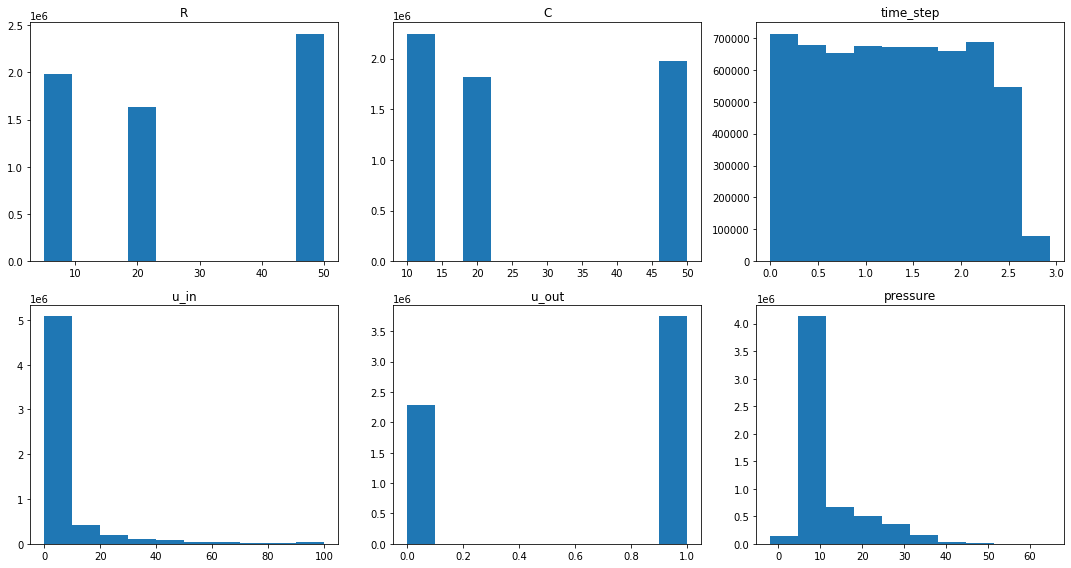

In [ ]:
plt.figure(figsize=(15,8))

i = 0
for col in df.columns[2:]:
  plt.subplot(2,3,i+1)
  plt.hist(df[col])
  plt.title(col)
  i += 1

plt.tight_layout()

In [ ]:
def plot(breath_id):

  df_temp = df[df['breath_id'] == breath_id]
  plt.plot(df_temp['time_step'], df_temp['pressure'], label='pressure')
  plt.plot(df_temp['time_step'], df_temp['u_in'], label='u_in(%)')

  # title
  bb = df_temp['breath_id'].to_list()[0]
  rr = df_temp['R'].to_list()[0]
  cc = df_temp['C'].to_list()[0]
  tt = df_temp['time_step'].to_list()[-1] - df_temp['time_step'].to_list()[0]
  title = f'Breath_ID={bb}, R={rr}, C={cc}, Length={tt:.3}'
  plt.title(title)

  # y-axis range
  ax = plt.gca()
  ax.set_ylim([0, 3])
  ax.set_ylim([-3, 50])

  # expiratory phase
  exp_start = df_temp[df_temp['u_out'] == 1]['time_step'].to_list()[0]
  plt.axvline(x=exp_start, color='grey', linestyle='--')

  plt.legend()

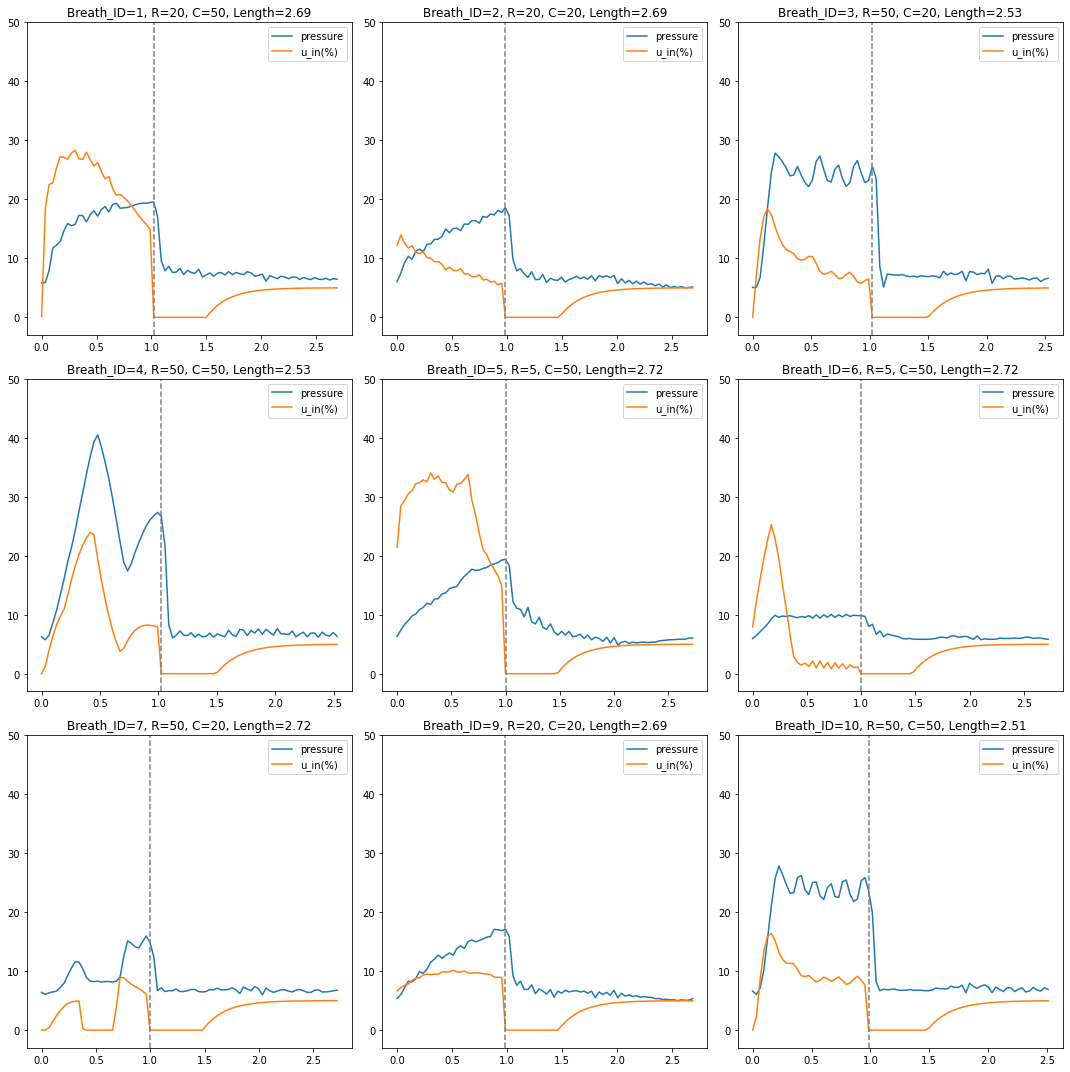

In [ ]:
plt.figure(figsize=(15,15))

for i in range(9):
  plt.subplot(3,3,i+1)
  breath_id = df['breath_id'].unique()[i]
  plot(breath_id)

plt.tight_layout()

In [ ]:
# Smooth data using interpolation
#!pip install traces
import traces
from datetime import datetime

In [ ]:
breath_id = 7
df_temp = df[df['breath_id'] == breath_id]
df_temp = df_temp[['time_step', 'pressure']]
df_temp['mask'] = np.zeros(len(df_temp))

df_temp

,time_step,pressure,mask
480,0.000000,6.399909,0.0
481,0.034106,6.048398,0.0
482,0.068965,6.329607,0.0
483,0.103131,6.470211,0.0
484,0.137415,6.610815,0.0
...,...,...,...
555,2.582165,6.470211,0.0
556,2.616405,6.470211,0.0
557,2.651437,6.540513,0.0
558,2.685853,6.681117,0.0


In [ ]:
data_temp = {'time_step': np.arange(0,2.5,0.025),
             'pressure': np.nan,
             'mask':np.ones(len(np.arange(0,2.5,0.025)))}

df_gen = pd.DataFrame.from_dict(data_temp)

In [ ]:
df_new = pd.concat((df_gen, df_temp))

df_new = df_new.sort_values(by='time_step', ascending=True)

In [ ]:
df_new = df_new.interpolate(method='linear', axis=0)
df_new = df_new.iloc[1:]

df_new = df_new[df_new['mask'] == 1]

Text(0.5, 1.0, 'After interpolation')

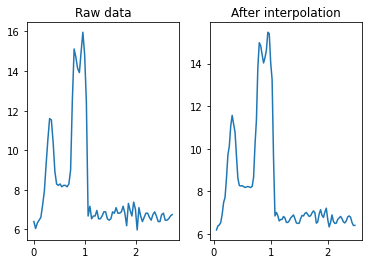

In [ ]:
plt.subplot(1,2,1)
plt.plot(df_temp['time_step'], df_temp['pressure'], label='pressure')
plt.title('Raw data')

plt.subplot(1,2,2)
plt.plot(df_new['time_step'], df_new['pressure'], label='pressure')
plt.title('After interpolation')

In [ ]:
df

,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.083334,0,5.837492
1,2,1,20,50,0.033652,18.383041,0,5.907794
2,3,1,20,50,0.067514,22.509278,0,7.876254
3,4,1,20,50,0.101542,22.808822,0,11.742872
4,5,1,20,50,0.135756,25.355850,0,12.234987
...,...,...,...,...,...,...,...,...
6035995,6035996,125749,50,10,2.504603,1.489714,1,3.869032
6035996,6035997,125749,50,10,2.537961,1.488497,1,3.869032
6035997,6035998,125749,50,10,2.571408,1.558978,1,3.798729
6035998,6035999,125749,50,10,2.604744,1.272663,1,4.079938


# Discussion



1.   Interpolation among time steps - to standardize the unevenly time gaps.
2.   'R', 'C' columns get standardized
3.  

